# **EDA analysis of Windows Log**

In [1]:
# EDA analysis of Windows Log

In [1]:
#imprting libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# configuring matplotlib for inline plotting means that the plots will be displayed in the notebook
%matplotlib inline

In [7]:
# configuring 
# defining base directory as current working directory
base_dir = os.getcwd()
# defining the path to the log file data .csv file
log_file_path = os.path.join(base_dir,'data','WindowsEventLogs_Last30Days.csv')


In [8]:
# reading the log file data into a pandas dataframe
log_df = pd.read_csv(log_file_path)
print(log_df.head())

           TimeCreated     Id LevelDisplayName  \
0  21-05-2025 10:44:41  16384      Information   
1  21-05-2025 10:44:11  16394      Information   
2  21-05-2025 10:40:08      1      Information   
3  21-05-2025 10:40:08      1      Information   
4  21-05-2025 10:40:07      1      Information   

                     ProviderName  \
0  Microsoft-Windows-Security-SPP   
1  Microsoft-Windows-Security-SPP   
2                 Universal Print   
3                 Universal Print   
4                 Universal Print   

                                             Message      LogName  
0  Successfully scheduled Software Protection ser...  Application  
1             Offline downlevel migration succeeded.  Application  
2  Initialization Successful. Enabled=false, Clou...  Application  
3  Universal Print is not enabled in the user's t...  Application  
4  Successfully received access_token for 0000000...  Application  


we have dataframe with 6 columns and 49201 rows 

In [10]:
# checking the shape of the dataframe
print(log_df.shape)

(49201, 6)


we have columns TimeCreated, Id, LevelDisplayName, ProviderName, Message, LogName with data type as object except Id which is int64

In [11]:
# columns of dataframe
print(log_df.columns)

Index(['TimeCreated', 'Id', 'LevelDisplayName', 'ProviderName', 'Message',
       'LogName'],
      dtype='object')


In [12]:
# checking the data types of the columns
print(log_df.dtypes)

TimeCreated         object
Id                   int64
LevelDisplayName    object
ProviderName        object
Message             object
LogName             object
dtype: object


In [15]:
# we will do data cleaning and data preprocessing

# checking for null values in the dataframe
# we will also print the row of the dataframe which has null values
print(log_df[log_df.isnull().any(axis=1)])
print(log_df.isnull().sum())

               TimeCreated    Id LevelDisplayName              ProviderName  \
63     21-05-2025 10:30:40  9997      Information               Application   
95     21-05-2025 10:29:11     0              NaN  RtkAudioUniversalService   
96     21-05-2025 10:29:11     0              NaN           SynTPEnhService   
108    21-05-2025 03:19:51     0              NaN  RtkAudioUniversalService   
115    21-05-2025 03:19:49     0              NaN           SynTPEnhService   
...                    ...   ...              ...                       ...   
49127  22-04-2025 02:30:55  7021      Information                  Netwtw14   
49159  21-04-2025 22:43:44  7021      Information                  Netwtw14   
49161  21-04-2025 22:41:14  7021      Information                  Netwtw14   
49166  21-04-2025 22:37:56  7021      Information                  Netwtw14   
49195  21-04-2025 19:43:04  7021      Information                  Netwtw14   

      Message      LogName  
63        NaN  Applica

after removing the null values we will have 48231 rows and 6 columns 

In [19]:
# we will drop the null values from the dataframe
log_df = log_df.dropna()
# checking the shape of the dataframe after dropping null values
print(log_df.shape)
print(log_df.isnull().sum())


(48231, 6)
TimeCreated         0
Id                  0
LevelDisplayName    0
ProviderName        0
Message             0
LogName             0
dtype: int64


# **now we will do Analysis of the data with different columns and their values in diffent ways**

first we will do analysis of the data with respect to TimeCreated column
# *Timestamp Analysis*

In [23]:
# converting the TimeCreated column to datetime format
log_df= log_df.copy()
log_df['TimeCreated'] = pd.to_datetime(
    log_df['TimeCreated'],
    format='%d-%m-%Y %H:%M:%S'
) #year/month/day hour/minute/
print(log_df['TimeCreated'].head())
print(log_df.dtypes)

0   2025-05-21 10:44:41
1   2025-05-21 10:44:11
2   2025-05-21 10:40:08
3   2025-05-21 10:40:08
4   2025-05-21 10:40:07
Name: TimeCreated, dtype: datetime64[ns]
TimeCreated         datetime64[ns]
Id                           int64
LevelDisplayName            object
ProviderName                object
Message                     object
LogName                     object
dtype: object


In [24]:
# TimeCreated column is converted to datetime format datetime64[ns]


In [26]:
# minimum and maximum date in the TimeCreated column
min_date= log_df['TimeCreated'].min()
max_date= log_df['TimeCreated'].max()

2025-04-21 19:43:02
2025-05-21 10:51:28


## *Temporal Event Sequence Analysis*
goal: Identify patterns in the order/timing of events

### *method*
1. Lag analysis:Compute time differences between consecutive events of specific Id or ProviderName (e.g., security-related events like 4624 [logon] and 4625 [failed logon]).
2. Markov Chains: Model transition probabilities between event types (e.g., likelihood of an "Error" following a "Warning").
3. Sequence Mining: Use algorithms like SPADE to discover frequent event sequences (e.g., repeated failed logons followed by a successful logon).

In [28]:
#we will sort the dataframe by TimeCreated column
log_df =log_df.sort_values(by='TimeCreated').reset_index(drop=True) #.reset_index(drop=True) will reset the index of the dataframe

print(log_df.head())


          TimeCreated    Id LevelDisplayName                    ProviderName  \
0 2025-04-21 19:43:02  6013      Information                        EventLog   
1 2025-04-21 19:43:02   172      Information  Microsoft-Windows-Kernel-Power   
2 2025-04-21 19:43:03  1008          Warning       Microsoft-Windows-Perflib   
3 2025-04-21 19:43:03  1008          Warning       Microsoft-Windows-Perflib   
4 2025-04-21 19:43:03  1008          Warning       Microsoft-Windows-Perflib   

                                             Message      LogName  
0                The system uptime is 37734 seconds.       System  
1  Connectivity state in standby: Connected, Reas...       System  
2  The Open procedure for service "aspnet_state" ...  Application  
3  The Open procedure for service "ASP.NET_4.0.30...  Application  
4  The Open procedure for service "ASP.NET" in DL...  Application  


#### *Lag Analysis*
Some critical Event IDs include:

 

    4624: User successfully logged on to a computer
    4625: Attempt made to logon with unknown user name or bad password and failed
    4634: Logoff process completed for user
    4647: User Initiated logoff
    4648: User successfully logged on to a computer using explicit credentials while already logged on as different user
    4779: User disconnected terminal server or virtual host session without logging off
    4798: A user’s local group membership was enumerated.
    4799: A security-enabled local group membership was enumerated
    4820: A Kerberos Ticket-granting-ticket (TGT) was denied
    4821: A Kerberos service ticket was denied because the user, device, or both does not meet the access control restrictions
    4822: NTLM authentication failed because the account was a member of the Protected User group
    4823: NTLM authentication failed because access control restrictions are required
    4824: Kerberos pre-authentication by using DES or RC4 failed because the account was a member of the Protected User group
    
Some important Event IDs to consider include:

 

    4103: PowerShell Module Logging
    4104: PowerShell Script Block Logging
    4656: Request to handle or access an object
    4658: Handle to an object was closed
    4659: Handle to an object was requested with intent to delete
    4660: Object deleted
    4663: Attempt to access object was made
    4664: Attempt to create a hard link was made
    4670: Object permissions were changed
    4672: Special Privileges Assigned to New Logon
    4673: Calling privileged service
    4674: Attempted operation on a privileged object
    4985: Transaction state change
    4691: Indirect access to an object was requested.
    4698: A scheduled task was created.
    4699: A scheduled task was deleted.
    4700: A scheduled task was enabled.
    4701: A scheduled task was disabled.
    4702: A scheduled task was updated.
    5051: File was virtualized

Microsoft Defender Antivirus Event IDs:

    1002: malware scan stopped before completing scan
    1003: malware scan paused
    1005: malware scan failed
    1006, 1116: malware or unwanted software detected
    1007, 1117: action to protect system performed
    1008, 1118: action to protect system failed
    1009: item restored from quarantine
    1012: unable to delete item in quarantine
    1015: suspicious behavior detected
    1119: critical error occurred when taking action



------Lag analysis result:-----


,Group,TimeEvent1,IdEvent1,TimeEvent2,IdEvent2,Lag_Seconds
0,Global,2025-05-18 17:29:15,4624,2025-05-18 17:29:16,4625,0 days 00:00:01
1,Global,2025-05-18 18:42:36,4624,2025-05-18 18:58:31,4625,0 days 00:15:55
2,Global,2025-05-18 19:04:17,4624,2025-05-18 19:04:35,4625,0 days 00:00:18
3,Global,2025-05-19 20:16:36,4624,2025-05-19 20:16:37,4625,0 days 00:00:01
4,Global,2025-05-20 10:21:50,4624,2025-05-20 10:21:50,4625,0 days 00:00:00


descriptive statistics of lag analysis result:


,TimeEvent1,IdEvent1,TimeEvent2,IdEvent2,Lag_Seconds
count,6,6.0,6,6.0,6
mean,2025-05-19 16:03:57.333333248,4624.0,2025-05-19 16:06:39.833333504,4625.0,0 days 00:02:42.500000
min,2025-05-18 17:29:15,4624.0,2025-05-18 17:29:16,4625.0,0 days 00:00:00
25%,2025-05-18 18:48:01.249999872,4624.0,2025-05-18 19:00:02,4625.0,0 days 00:00:00.250000
50%,2025-05-19 07:40:26.500000,4624.0,2025-05-19 07:40:36,4625.0,0 days 00:00:01
75%,2025-05-20 06:50:31.500000,4624.0,2025-05-20 06:50:31.750000128,4625.0,0 days 00:00:13.750000
max,2025-05-21 10:29:10,4624.0,2025-05-21 10:29:10,4625.0,0 days 00:15:55
std,NaN,0.0,NaN,0.0,0 days 00:06:28.307481256


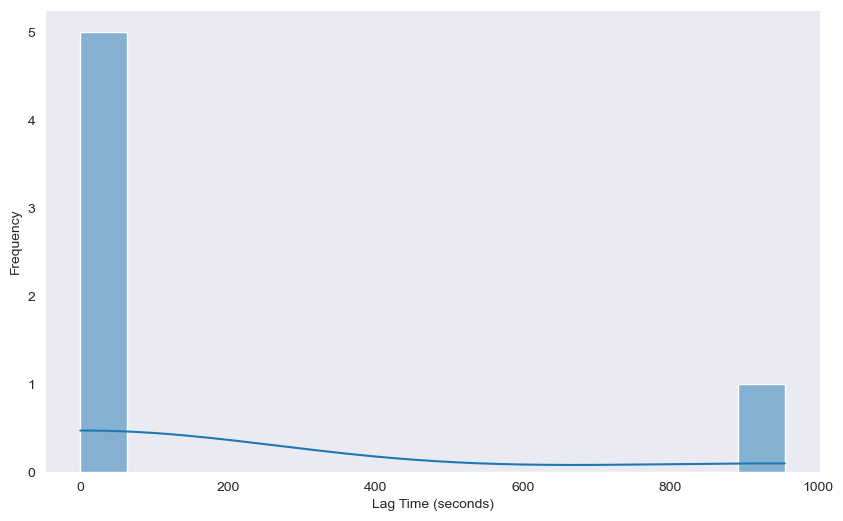

In [47]:
# lag analysis Goal: Compute time differences between consecutive events of specific Id
# lets take the example of event id 4624 log on and 4625 failed log on

event_id_4624 = 4624 #successful log on
event_id_4625 = 4625 #failed log on


lag_analysis_result= []

#filter relevant events
df_filtered_lag = log_df[log_df['Id'].isin([event_id_4624, event_id_4625])].copy()

if df_filtered_lag.empty:
    print("No relevant events found for lag analysis.")
else:
    #currently doing global anylysis
    df_global_lag = df_filtered_lag.sort_values(by='TimeCreated').reset_index(drop=True) #.reset_index(drop=True) will reset the index of the dataframe
    
    for i in range(len(df_global_lag)-1):
        curr_event= df_global_lag.iloc[i]
        next_event= df_global_lag.iloc[i+1]
        if curr_event['Id']== event_id_4624 and next_event['Id']== event_id_4625:
            time_diff = next_event['TimeCreated']-curr_event['TimeCreated']
            lag_analysis_result.append({
                'Group': 'Global',
                'TimeEvent1': curr_event['TimeCreated'],
                'IdEvent1': curr_event['Id'],
                'TimeEvent2': next_event['TimeCreated'],
                'IdEvent2': next_event['Id'],
                'Lag_Seconds': time_diff
                
            })
    
if lag_analysis_result:
    df_lags= pd.DataFrame(lag_analysis_result)
    print('------Lag analysis result:-----')
    display(df_lags.head())
    
    
    print('descriptive statistics of lag analysis result:')
    display(df_lags.describe())
    
    df_lags['Lag_Seconds'] = df_lags['Lag_Seconds'].dt.total_seconds()
    df_lags =df_lags[df_lags['Lag_Seconds'].between(0, 360000000000000)] # filter out lag times greater than 10 days
    plt.figure(figsize=(10,6))
    sns.histplot(df_lags['Lag_Seconds'], bins=15, kde=True)
    
    #plt.xticks(f'distribution of lag time between event id {event_id_4624} and {event_id_4625}')
    plt.xlabel('Lag Time (seconds)')
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()
    
    
        

